In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

In [2]:
class regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(1, 5),
            nn.ReLU(),
            nn.Linear(5, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 1)
        )
        self.reset_parameters()

    def forward(self,x):
        x = self.linear(x)
        return x
    def reset_parameters(self):
        for layer in self.linear:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_normal_(layer.weight)
                nn.init.zeros_(layer.bias)

In [3]:
class dataset(Dataset):
    def __init__(self, data : list):
        self.data = data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        x = torch.tensor(self.data[idx][0],dtype=torch.float32).reshape(-1,1)
        y = torch.tensor(self.data[idx][1],dtype=torch.float32).reshape(-1,1)
        return x, y

In [4]:
def normalize(data: np.array):
    return (data - data.mean()) / data.std()

def plot(model,epoch):
    plt.cla()
    # plot the mormalized data
    plt.scatter(data[:,0], data[:,1],c='r')
    # plot the predicted data
    # get the max input and min input
    max_input = data.max()
    min_input = data.min()
    # get the predicted data
    x = torch.linspace(min_input, max_input, 100).reshape(-1,1)
    y = model(x)
    # plot the predicted data
    plt.plot(x.detach().numpy(), y.detach().numpy())
    plt.savefig(os.path.join('images',f'results{epoch}.png'))

In [8]:
def train():
    for epoch in range(10000):
        for x,y in point_loader:
            optimizer.zero_grad()
            output = model(x)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            if epoch % 100 == 0:
                print(f'epoch: {epoch} loss: {loss.item()}')
                plot(model,epoch)

In [9]:
import imageio
import os
import natsort
def make_gif(path = 'images'):
    image_files = natsort.natsorted(os.listdir(path))
    images = [imageio.imread(os.path.join(path, f)) for f in image_files]
    imageio.mimsave('training.gif', images, fps=20)

epoch: 0 loss: 2.2271292209625244
epoch: 0 loss: 0.1143597885966301
epoch: 0 loss: 0.3858526647090912
epoch: 0 loss: 0.06113487109541893
epoch: 0 loss: 0.31607407331466675
epoch: 100 loss: 0.2045845240354538
epoch: 100 loss: 0.04672042280435562
epoch: 100 loss: 0.15338890254497528
epoch: 100 loss: 0.010645403526723385
epoch: 100 loss: 0.40450575947761536
epoch: 200 loss: 0.06727355718612671
epoch: 200 loss: 0.10427649319171906
epoch: 200 loss: 0.12198392301797867
epoch: 200 loss: 0.03776167333126068
epoch: 200 loss: 0.15821389853954315
epoch: 300 loss: 0.03212974965572357
epoch: 300 loss: 0.1422586739063263
epoch: 300 loss: 0.0822598934173584
epoch: 300 loss: 0.05138348788022995
epoch: 300 loss: 0.0742259994149208
epoch: 400 loss: 0.02430410496890545
epoch: 400 loss: 0.15793076157569885
epoch: 400 loss: 0.06044069677591324
epoch: 400 loss: 0.05855685845017433
epoch: 400 loss: 0.03978191316127777
epoch: 500 loss: 0.023166775703430176
epoch: 500 loss: 0.16127073764801025
epoch: 500 loss:

KeyboardInterrupt: 

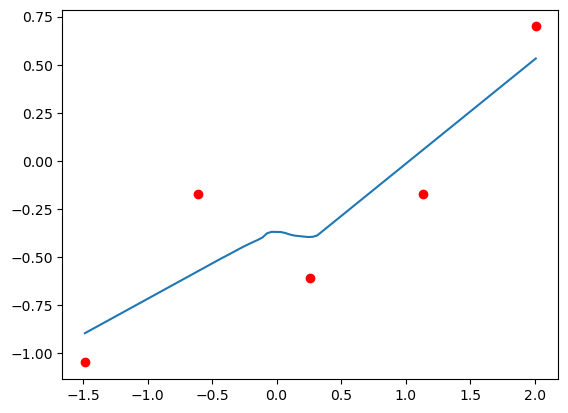

In [11]:
path = 'images'
if os.path.exists(path):
    shutil.rmtree(path)
os.makedirs(path)
data = [[1, 2], [3, 4], [5, 3], [7, 4], [9, 6]]
data = np.array(data)
data = normalize(data)
points = dataset(data)
point_loader = DataLoader(points, batch_size=1, shuffle=False)
model = regression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)
train()
make_gif()
